In [1]:
from pathlib import Path
import json

from paths import latent_space_folder, models_folder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the model information

In [2]:
list(models_folder.glob('*'))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_64_32_16_8_stride_4_B1H_Inst_znorm_abs_diff_seed_42'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_time_dist_32_16_B1H_Inst_500'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_stride_4_B1H_Inst'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_stride_4_B1H_Inst_jorg'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_8_stride_4_B1H_Inst_presplit_center_scale_1000_seed_42'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_8_stride_4_B1H_Inst_center_scale_10000_seed_42'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_8_stride_4_B1H_Inst_center_scale_1000_seed_42'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/models/model_conv_32_16_8_stride_4_B1H_Inst_center_scale_100_s

In [3]:
model = models_folder / "model_conv_64_32_16_stride_4_B1H_Inst_center_scale_100_seed_42"

In [4]:
model_metadata = json.load((model / 'metadata.json').open('r'))
model_metadata

{'generator': {'metadata_path': '/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/metadata/metadata_B1H_Inst_34994.h5',
  'shuffle': True,
  'seed': 42,
  'n_bunches': 256,
  'sequence_length': 2048,
  'batch_size': 8192,
  'normalization': 'center_scale',
  'normalization_pre_split': False,
  'normalization_kwargs': {'scale_factor': 100}},
 'history': {'loss': [0.09994560480117798,
   0.0647285133600235,
   0.05410163849592209,
   0.049998026341199875,
   0.04258928447961807,
   0.04056926816701889,
   0.03787385672330856,
   0.0387423001229763,
   0.04287436977028847,
   0.03097667172551155,
   0.03027091547846794,
   0.03537498414516449,
   0.03361206874251366,
   0.04385533928871155,
   0.03838837519288063,
   0.02619841694831848,
   0.03545904532074928,
   0.02849256619811058,
   0.03601016849279404,
   0.04187408834695816,
   0.03200209513306618,
   0.028486618772149086,
   0.03195280209183693,
   0.03142734244465828,
   0.031091947108507156,
   0.031249141320586205,
   0.033955

# Choose a dataset

In [5]:
list(latent_space_folder.glob('*'))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42')]

In [6]:
latent_dataset_folder = latent_space_folder / "model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42"

In [7]:
list(latent_dataset_folder.glob('*'))

[PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42/metadata_latent_space_65536.h5'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42/latent_space_65536.npy'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42/train_dataset_409600.npy'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42/train_max_MAE_409600.npy'),
 PosixPath('/afs/cern.ch/work/l/lcoyle/public/obsbox_analysis/latent_space/model_conv_64_32_16_8_stride_4_B1H_Inst_center_scale_100_seed_42/latent_input_65536.npy')]

In [8]:
latent_dataset_file = latent_dataset_folder / "latent_space_65536.npy"
latent_metadata_file = latent_dataset_folder / "metadata_latent_space_65536.h5"
latent_input_file = latent_dataset_folder / "latent_input_65536.npy"
train_dataset_file = latent_dataset_folder / "train_dataset_409600.npy"
train_max_MAE_file = latent_dataset_folder / "train_max_MAE_409600.npy"

# Load the latent dataset

In [9]:
latent_data = np.load(latent_dataset_file)
latent_data.shape

(65536, 8, 8)

# Load the latent encoding input data

In [10]:
latent_input = np.load(latent_input_file)
latent_input.shape

(65536, 2048, 1)

# Load the train dataset (partial)

In [11]:
train_dataset = np.load(train_dataset_file)
train_dataset.shape

(409600, 2048, 1)

# Load the sorted MAE indices

In [12]:
train_max_MAE = np.load(train_max_MAE_file)
train_max_MAE.shape

(409600,)

# Load the metadata

In [13]:
latent_metadata = pd.read_hdf(latent_metadata_file)
latent_metadata

,type,fill,beam,plane,q,date_time,file,n_bunches,bunch_index,bunch_number,ts_length
6018714,Inst,6690,1,h,7,2018-05-16 06:04:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6690/...,1227,1138.0,402.0,65536
4111950,Inst,6347,1,h,7,2017-10-30 12:03:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6347/...,1868,518.0,281.0,65536
1169867,Inst,6255,1,h,7,2017-09-29 08:47:15,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6255/...,1916,494.0,268.0,65536
309793,Inst,6355,1,h,7,2017-11-01 19:27:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6355/...,1868,474.0,252.0,65536
2863291,Inst,7443,1,h,7,2018-11-14 03:46:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7443/...,336,151.0,24.0,65536
...,...,...,...,...,...,...,...,...,...,...,...
11433107,Inst,6628,1,h,7,2018-05-01 08:08:14,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/6628/...,1551,384.0,225.0,65536
8472488,Inst,7347,1,h,7,2018-10-25 11:49:52,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7347/...,2556,1550.0,1144.0,65536
7362217,Inst,7033,1,h,7,2018-08-07 08:37:15,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7033/...,2556,3028.0,2261.0,65536
10488204,Inst,7042,1,h,7,2018-08-10 16:08:49,/nfs/cs-ccr-adtobsnfs/lhc_adtobsbox_data/7042/...,636,685.0,494.0,65536


# Check the first few signals

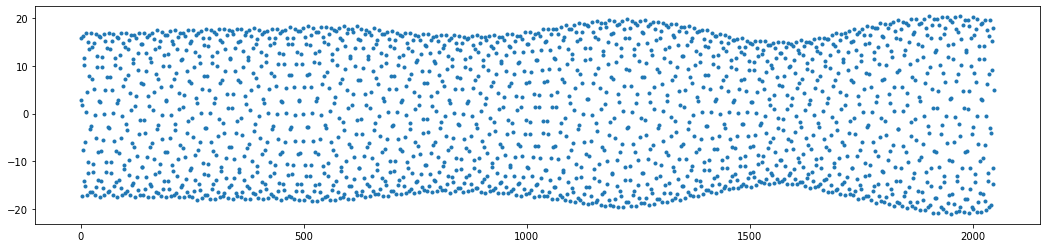

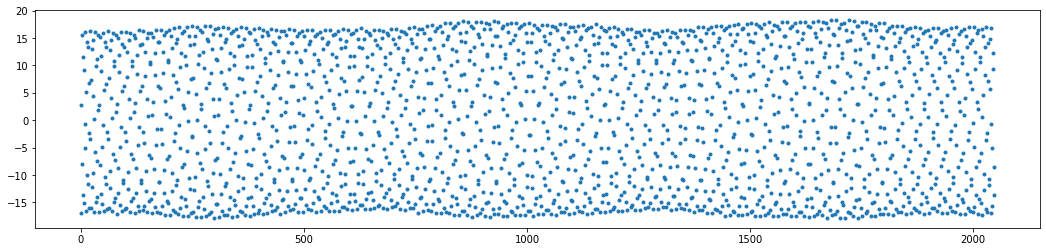

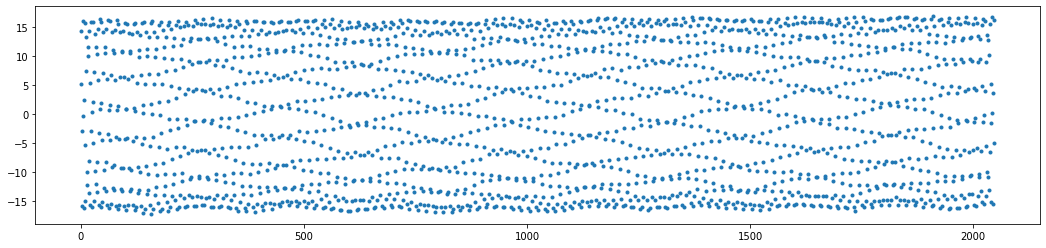

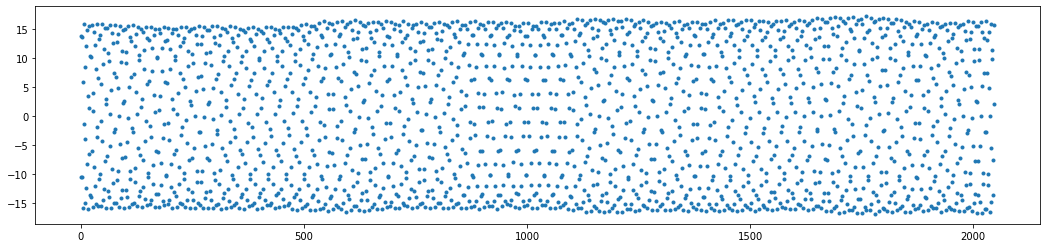

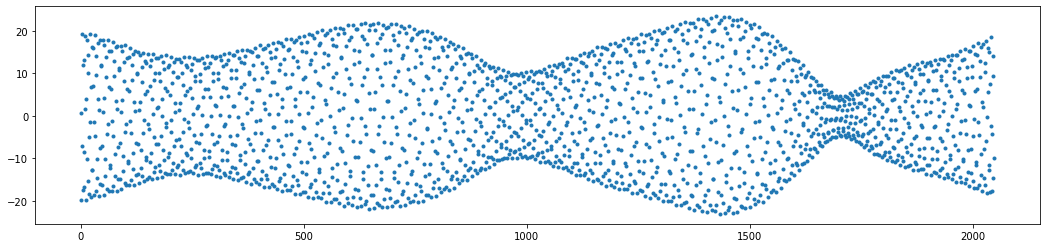

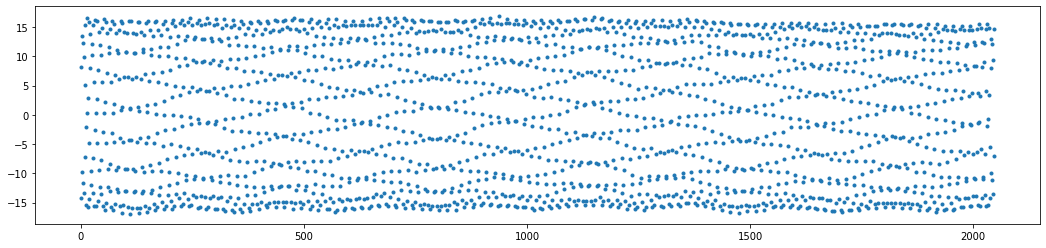

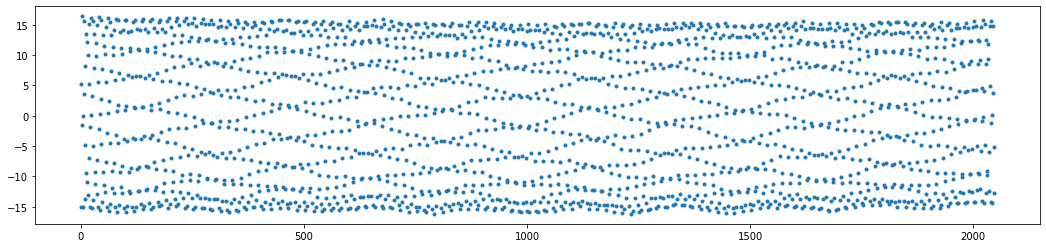

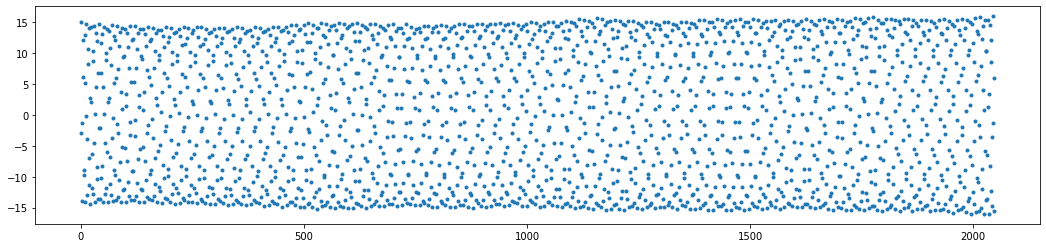

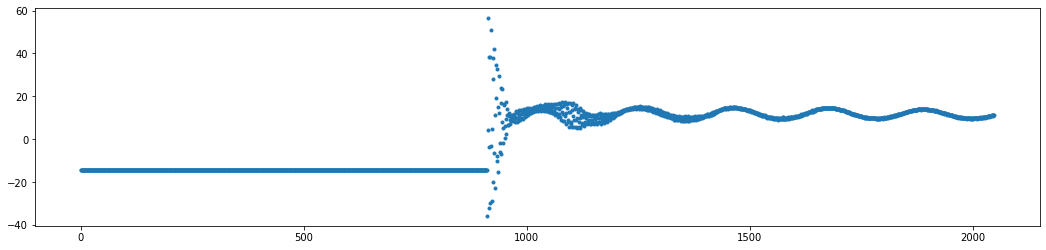

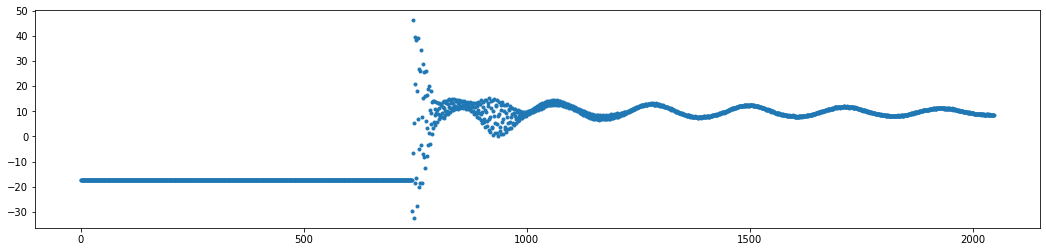

In [14]:
for signal in latent_input[:10]:
    plt.figure(figsize=(18, 4))
    plt.plot(signal, linewidth=0, marker='.')
    plt.show()

# Just the first few signals

In [15]:
n_subset = 256
latent_data = latent_data[:n_subset]
latent_input = latent_input[:n_subset]

In [16]:
latent_data.shape

(256, 8, 8)

# Normalize the dataset

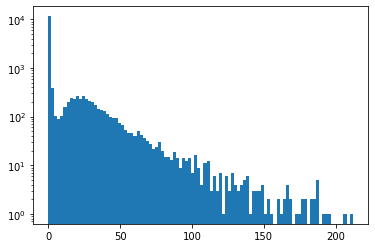

In [17]:
plt.hist(latent_data.flatten(), bins=100)
plt.yscale("log")

In [18]:
latent_data.mean()

9.885996

In [19]:
latent_data.max()

211.88582

In [20]:
latent_data.min()

0.0

In [21]:
latent_data.max(axis=(1,2))[:, None, None].shape

(256, 1, 1)

In [22]:
# latent_data_norm = latent_data / latent_data.max(axis=(1,2))[:, None, None]
latent_data_norm = latent_data / latent_data.max()

In [23]:
latent_data_norm.max()

1.0

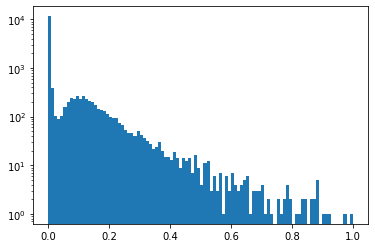

In [24]:
plt.hist(latent_data_norm.flatten(), bins=100)
plt.yscale("log")

In [25]:
latent_data_norm_flat = latent_data_norm.reshape((latent_data_norm.shape[0], -1))

# Baseline with K-means

In [26]:
from sklearn.cluster import KMeans

In [72]:
# clusters
n_clusters = 8
# Runs kmeans
kmeans = KMeans(n_clusters=n_clusters, n_init=32)
# Train K-Means.
clusters = kmeans.fit_predict(latent_data_norm_flat)

# Visualize the clusters

In [73]:
def plot_img_grid(img_data: list, n_imgs:int=64):
    fig, axes = plt.subplots(nrows=int(np.sqrt(n_imgs)), ncols=int(np.sqrt(n_imgs)), figsize=(10, 10))
    axes_flat = axes.flatten()
    for i, img in enumerate(img_data):
        axes_flat[i].imshow(img)
    for ax in axes_flat:
        ax.set_axis_off()
    return fig, axes

def plot_signal_grid(signal_data: list, n_plots:int=64):
    fig, axes = plt.subplots(nrows=int(np.sqrt(n_plots)), ncols=int(np.sqrt(n_plots)), figsize=(15, 5))
    axes_flat = axes.flatten()
    for i, signal in enumerate(signal_data):
        axes_flat[i].plot(signal, linewidth=0, marker=',')
    for ax in axes_flat:
        ax.set_axis_off()
    return fig, axes

cluster_id: 0, len 57


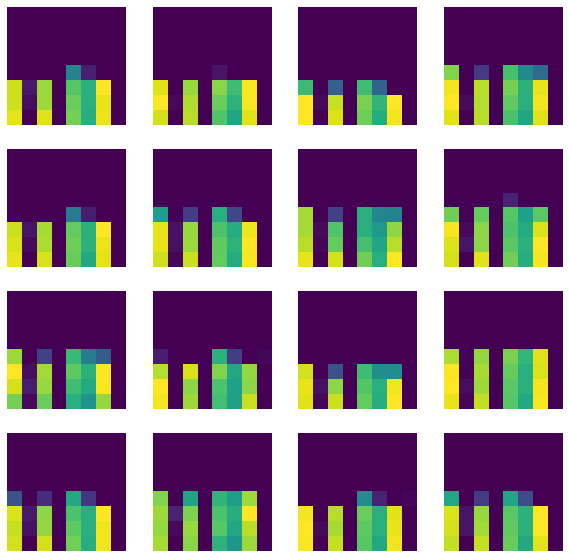

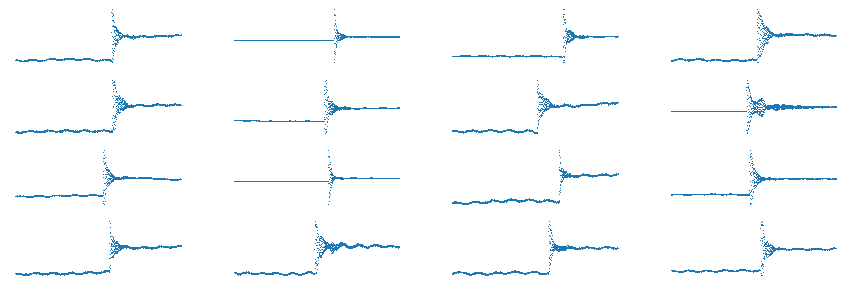

cluster_id: 1, len 73


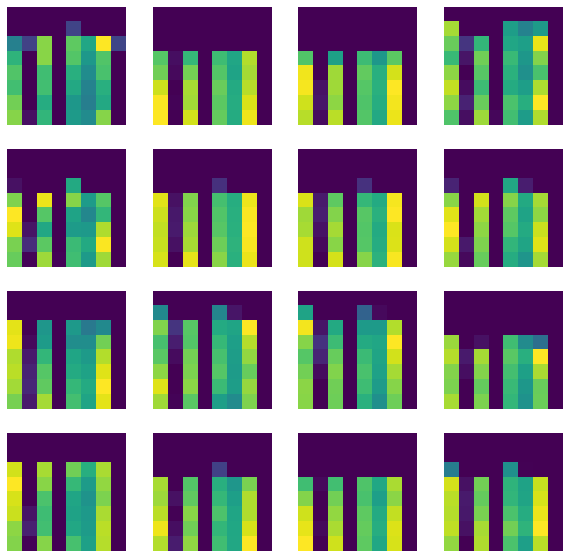

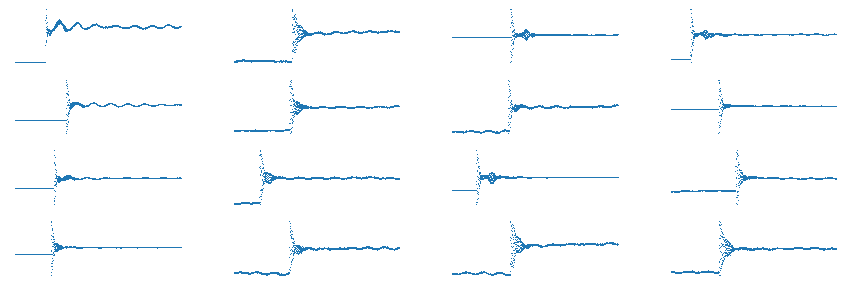

cluster_id: 2, len 14


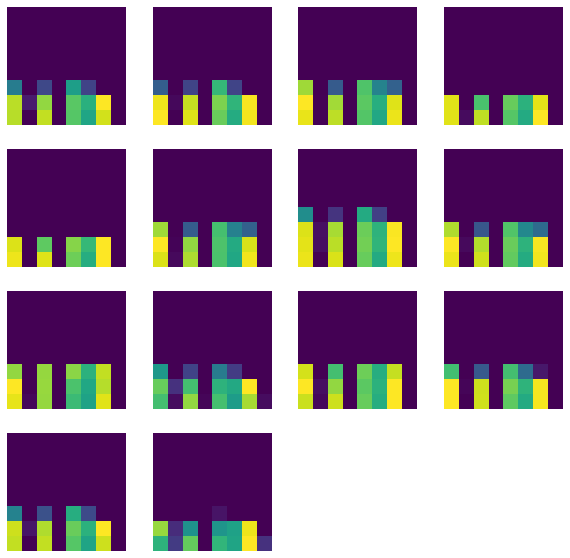

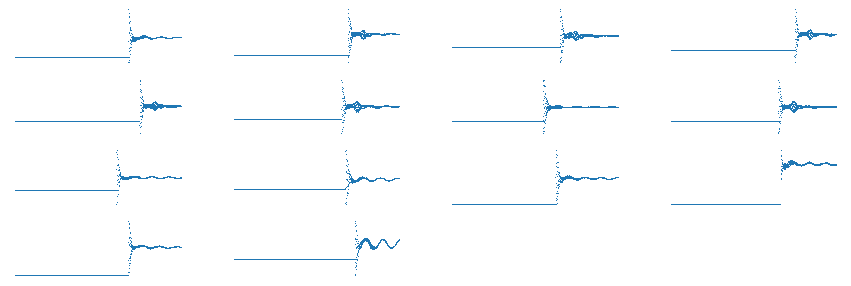

cluster_id: 3, len 16


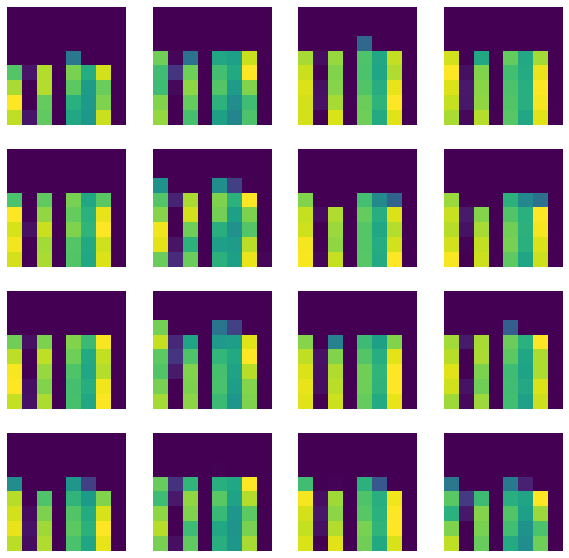

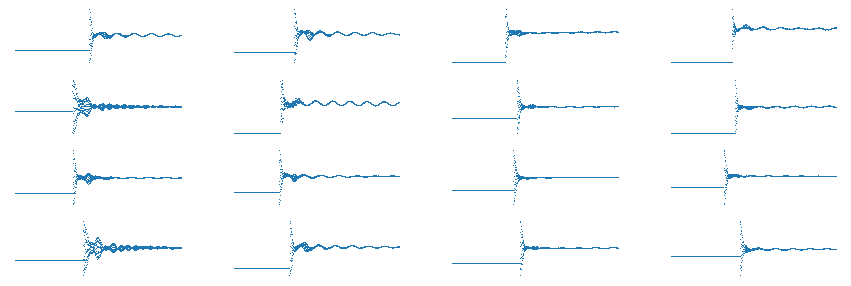

cluster_id: 4, len 3


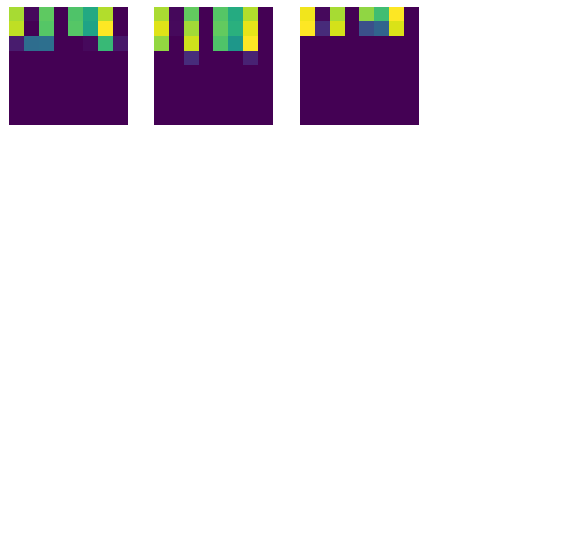

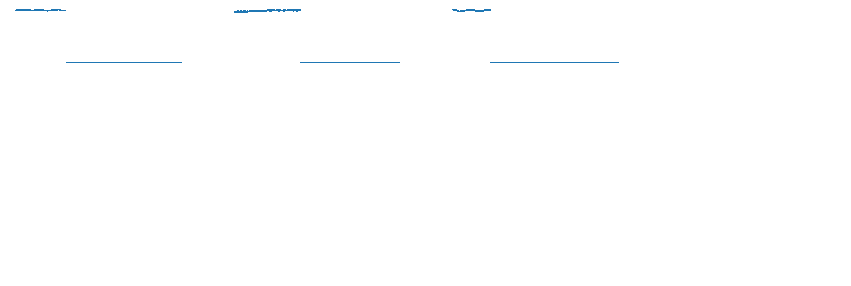

cluster_id: 5, len 11


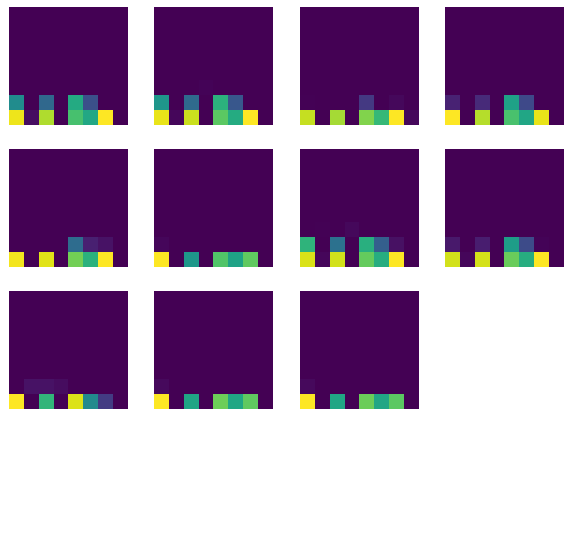

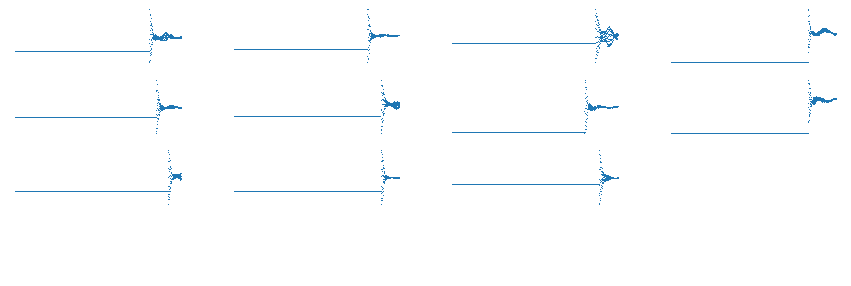

cluster_id: 6, len 16


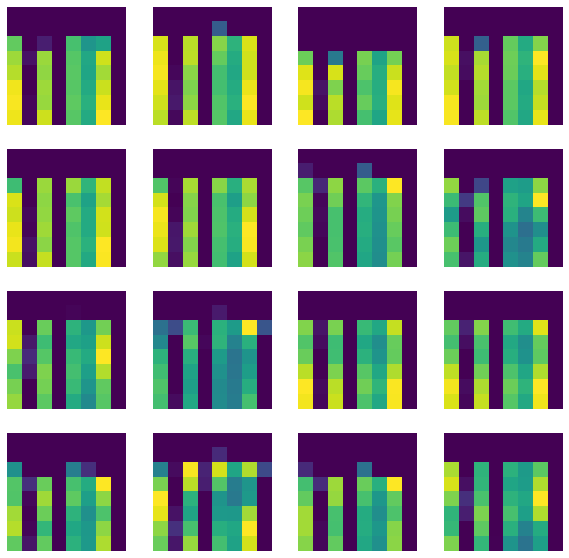

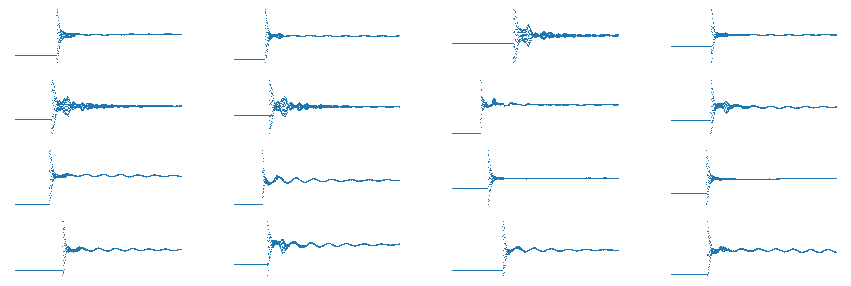

cluster_id: 7, len 66


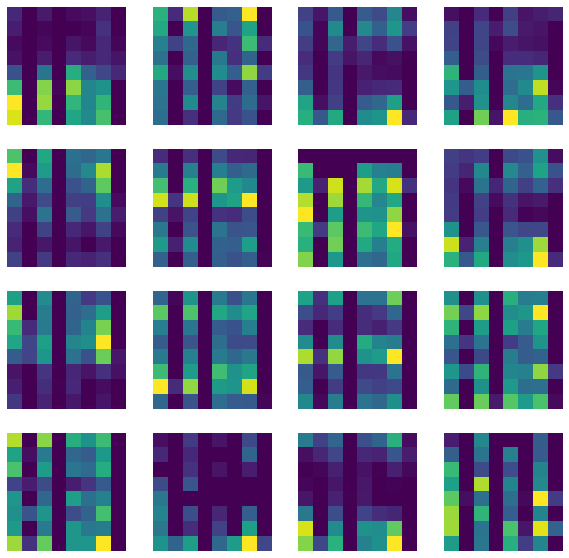

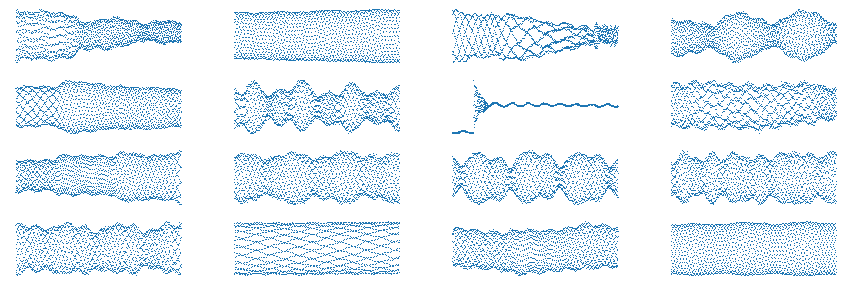

In [78]:
n_plot = 16
for cluster_id in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_id)[0]
    print(f"cluster_id: {cluster_id}, len {len(cluster_indices)}")
    if n_plot < len(cluster_indices):
        plot_index = np.random.choice(cluster_indices, size=n_plot, replace=False)
    else:
        plot_index = cluster_indices
        
    fig, axes = plot_img_grid([latent_data_norm[index] for index in plot_index], n_imgs=n_plot)
    plt.show()
    
    fig, axes = plot_signal_grid([latent_input[index] for index in plot_index], n_plots=n_plot)
    plt.show()
    
#     fig, axes = plot_signal_grid([np.abs(np.diff(latent_input[index], axis=0)) for index in plot_index], n_plots=n_plot)
#     plt.show()